#                                         Projet MADMC 
## Sélection bi-objectifs avec coefficients intervalles
## Group Weifei XIE & Yufei LIU

In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [19]:
# Question 2
def alea(n,m):
    #genere des exemple aleatoirement
    return m/4*np.random.randn(n, 2)+m

In [20]:
# Question 3

def compare(a,b):
    if b[0]<a[0] and b[1]<=a[1] :
        return True
    if b[0]<=a[0] and b[1]<a[1] :
        return True
    

def algoNaif(data):
    res=[]
    for i in range(len(data)):
        state=False
        for j in range(len(data)):
            if compare(data[i],data[j]):
                state = True
        if state== False :
            res.append(data[i])
    return res

In [21]:
# Question 4
def algoSecond(data):
    res=[]
    a=0
    data = np.array(data)
    data = data[np.argsort(data[:,0])[::-1]]
    n=len(data)
    for i in range(n):
        data=data[a:len(data),]
        m=len(data)
        min1=np.argmin(data[:,1])
        res.append(data[min1])
        a=min1+1
        if min1==m-1:
            break
    return res


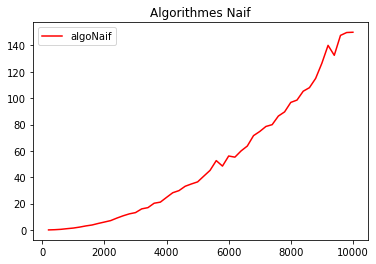

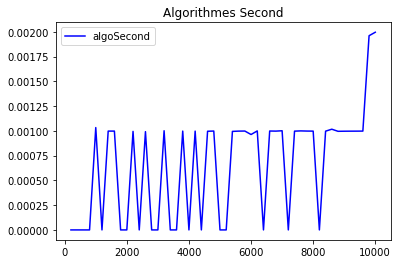

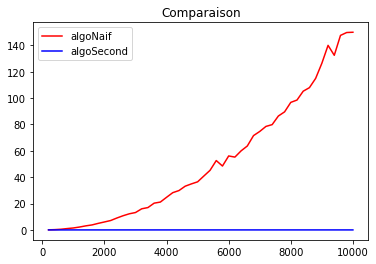

In [29]:
# Question 5

def traceComparer():
    m = 1000
    time_naif=[]
    time_second=[]
    for n in range(200, 10001, 200):
        ens = alea(n,m)
        t0 = time.time()
        res = algoNaif(ens)
        t1 = time.time()
        time_naif.append(t1-t0)
        t0 = time.time()
        res = algoSecond(ens)
        t2 = time.time()
        time_second.append(t2-t0)
    n_table = [n for n in range(200,10001,200)]
    ln1, = plt.plot(n_table,time_naif, color='red')
    plt.legend(handles=[ln1],labels=['algoNaif'])
    plt.title("Algorithmes Naif")
    plt.show()
    ln2, = plt.plot(n_table,time_second, color='blue')
    plt.legend(handles=[ln2],labels=['algoSecond'])
    plt.title("Algorithmes Second")
    plt.show()
    
    ln1, = plt.plot(n_table,time_naif, color='red')
    ln2, = plt.plot(n_table,time_second, color='blue')
    plt.legend(handles=[ln1, ln2],labels=['algoNaif', 'algoSecond'])
    plt.title("Comparaison")
    plt.show()
    
traceComparer()

In [23]:
# Question 7
def creeTab(n,k):
    tab=[]
    tab1=[]
    tab2=[]
    for i in range(k+1):
        tab1=[]
        if(i==0):
            for j in range(n):
                tab1.append([(0,0)])
        else:
            for x in range(n):
                tab1.append([])
        tab.append(tab1)
    return tab

def multidim_union(arr1, arr2):
    arr1_view = arr1.view([('',arr1.dtype)]*arr1.shape[1])
    arr2_view = arr2.view([('',arr2.dtype)]*arr2.shape[1])
    union = np.union1d(arr1_view, arr2_view)
    return union.view(arr1.dtype).reshape(-1, arr1.shape[1])
a=np.array([(1,4),(2,3),(5,2),(2,2),(3,1),(2,5)])
b=np.array([(1,4),(2,3),(5,2),(2,2),(3,1),(3,4)])
multidim_union(a,b)

def dynamique(n,k,data):
    tab= creeTab(n,k)
    for i in range(1,k+1):
        for j in range(k):
            if(j+1<i):
                tab[i][j].append((0,0))
            if(i==j+1):
                tab[i][j].append((np.sum(data[:i,0]),np.sum(data[:i,1])))
    for i in range(1,k+1):
        for j in range(n):
            if(j>=i):
                tab1=[]
                for e in tab[i-1][j-1]:
                    tab1.append(e+data[j])
                tab1=np.array(tab1)
                d=tab[i][j-1]
                d=np.array(d)
                tempdata=multidim_union(d,tab1)
                tab[i][j]=algoSecond(tempdata)
    return tab

data =[(1,4),(2,3),(5,2),(2,2),(3,1),(2,5),(3,4)]
data=np.array(data)
dynamique(7,3,data)

[[[(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)]],
 [[(1, 4)],
  [array([2, 3]), array([1, 4])],
  [array([5, 2]), array([2, 3]), array([1, 4])],
  [array([5, 2]), array([2, 2]), array([1, 4])],
  [array([3, 1]), array([2, 2]), array([1, 4])],
  [array([3, 1]), array([2, 2]), array([1, 4])],
  [array([3, 1]), array([2, 2]), array([1, 4])]],
 [[(0, 0)],
  [(3, 7)],
  [array([7, 5]), array([6, 6]), array([3, 7])],
  [array([7, 4]), array([4, 5]), array([3, 6])],
  [array([8, 3]), array([5, 3]), array([4, 5]), array([3, 6])],
  [array([8, 3]), array([5, 3]), array([4, 5]), array([3, 6])],
  [array([8, 3]), array([5, 3]), array([4, 5]), array([3, 6])]],
 [[(0, 0)],
  [(0, 0)],
  [(8, 9)],
  [array([9, 7]), array([8, 8]), array([5, 9])],
  [array([10,  5]), array([7, 6]), array([6, 7]), array([5, 9])],
  [array([10,  5]), array([7, 6]), array([6, 7]), array([5, 9])],
  [array([10,  5]), array([7, 6]), array([6, 7]), array([5, 9])]]]

In [24]:
# Question 8
def get_minimax(data, alpha_min, alpha_max):
    f_list=[]
    for d in data:
        if d[0]<=d[1]:
            f = alpha_min * d[0] + (1-alpha_min) * d[1]
        else:
            f = alpha_max * d[0] + (1-alpha_max) * d[1]
        f_list.append(round(f,8))
    f_array = np.array(f_list)
    f_mini_index = np.where(f_array==np.min(f_array))
    res = []
    for i in f_mini_index[0]:
        res.append(data[i])
    return np.array(res)


data =[(1,4),(2,3),(5,2),(2,2),(3,1),(2,5),(3,4)]
data=np.array(data)
get_minimax(data, 0, 1)


array([[2, 2]])

In [25]:
# Question 9
def approche1(n, k, data, alpha_min, alpha_max):
    tab = dynamique(n, k, data)
    return get_minimax(tab[k][n-1], alpha_min, alpha_max)

data =[(1,4),(2,3),(5,2),(2,2),(3,1),(2,5),(3,4)]
data=np.array(data)
approche1(7,3,data,0.1,0.9)


array([[7, 6],
       [6, 7]])

In [26]:
# Question 11


def transfer(amin, amax, data ):
    tab=[]
    for i in data:
        a=amin*i[0]+(1-amin)*i[1]
        b=amax*i[0]+(1-amax)*i[1]
        tab.append([a,b])
    tab= np.array(tab)
    return tab

def back_to_origine(amin,amax,data):
    tab=[]
    for i in data:
        if amin == 0 and amax==1:
            y2 = i[0]
            y1 = i[1]
        elif amax == 1 and amin!=0:
            y1 = i[1]
            y2 = (i[0]-amin*i[1])/(1-amin)
        elif amin == 0 and amax!=1:
            y2 = i[0]
            y1 = (i[1]-(1-amax)*i[0])/amax
        else:
            c= (1-amin)*amax/amin-(1-amax)
            y2=i[0]*amax/amin-i[1]
            y2=y2/c
            c=amin*(1-amax)/(1-amin)-amax
            y1=i[0]*(1-amax)/(1-amin)-i[1]
            y1=y1/c
        tab.append((y1,y2))
    tab=np.array(tab)
    return tab

def approche2(n, k, data, alpha_min, alpha_max):
    data = transfer(alpha_min, alpha_max, data)
    tab = dynamique(n, k, data)
    #c=transfer(alpha_min,alpha_max,tab[k][n-1])
    #c=algoSecond(c)
    c = tab[k][n-1]
    d=back_to_origine(alpha_min,alpha_max,c)
    return get_minimax(d, alpha_min, alpha_max)

data =[(1,4),(2,3),(5,2),(2,2),(3,1),(2,5),(3,4)]
data=np.array(data)
approche2(7,3,data, 0.1,0.9)

array([[6., 7.],
       [7., 6.]])

In [27]:
# Question 12
def comparer_approche1et2(n, k, m):
    time_1 = []
    time_2 = []
    for i in range(1,21,1):
        alpha_min = 0.5 - 0.025*i
        alpha_max = 0.5 + 0.025*i
        time_11 = []
        time_22 = []
        for j in range(50):
            ens = alea(n, m)
            t0 = time.time()
            res = approche1(n,k,ens,alpha_min,alpha_max)
            t1 = time.time()
            time_11.append(t1-t0)
            t0 = time.time()
            res = approche2(n,k,ens,alpha_min,alpha_max)
            t2 = time.time()
            time_22.append(t2-t0)
        time_1.append(np.mean(np.array(time_11)))
        time_2.append(np.mean(np.array(time_22)))
    x=[0.05*i for i in range(1,21,1)]
    ln1, = plt.plot(x,time_1, color='red')
    plt.legend(handles=[ln1],labels=['Approche-1'])
    plt.title("Approche1")
    plt.show()
    ln2, = plt.plot(x,time_2, color='blue')
    plt.legend(handles=[ln2],labels=['Approche-2'])
    plt.title("Approche2")
    plt.show()
    
    ln1, = plt.plot(x,time_1, color='red')
    ln2, = plt.plot(x,time_2, color='blue')
    plt.legend(handles=[ln1, ln2],labels=['Approche-1', 'Approche-2'])
    plt.title("Comparaison")
    plt.show()

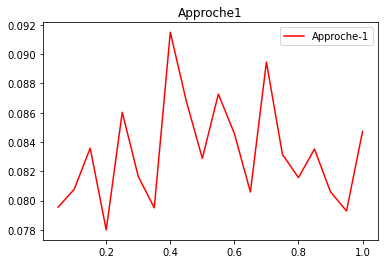

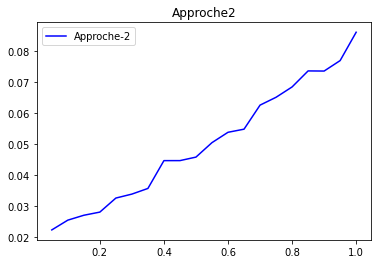

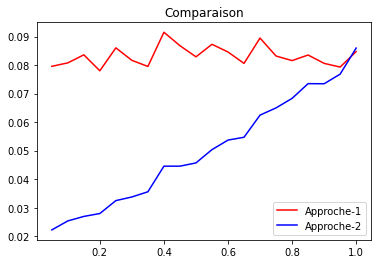

In [28]:
comparer_approche1et2(50,10,1000)